In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

#Task - 1a

In [3]:
signal = np.array([0]*200 + [1]*100 + [0]*200)
noise = np.random.rand(500)
noisy_signal = signal + noise

In [4]:
y = np.zeros((51))
print(len(y))

51


In [5]:
def maf(x, M):
  acc = 0
  for i in range(M):
    acc = acc + x[i]
  y = np.zeros((len(x)))
  y[int(M/2)] = acc/M

  for i in range(int(M/2)+1, len(x)-int(M/2)):
    acc = acc + x[i+int(M/2)] - x[i-(int(M/2)+1)]
    y[i] = acc/M
  return y

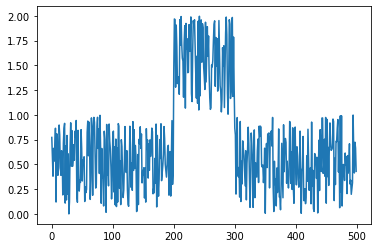

In [6]:
plt.plot(noisy_signal)
plt.show()

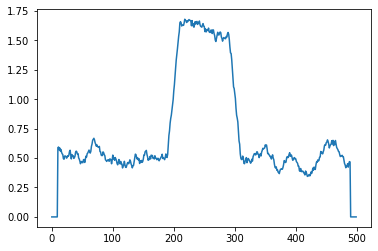

In [7]:
y = maf(noisy_signal, 20)
plt.plot(y)
plt.show()

#Task - 1b

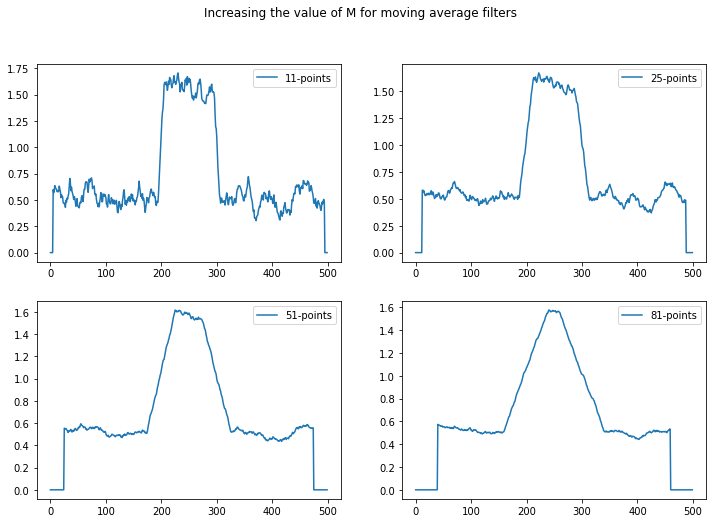

In [31]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Increasing the value of M for moving average filters')
gs  = gridspec.GridSpec(2, 2)
a1 = plt.subplot(gs[0])
a2 = plt.subplot(gs[1])
a3 = plt.subplot(gs[2])
a4 = plt.subplot(gs[3])

y11 = maf(noisy_signal, 11)
y25 = maf(noisy_signal, 25)
y51 = maf(noisy_signal, 51)
y81 = maf(noisy_signal, 81)

a1.plot(y11)
a1.legend(['11-points'])

a2.plot(y25)
a2.legend(['25-points'])

a3.plot(y51)
a3.legend(['51-points'])

a4.plot(y81)
a4.legend(['81-points'])

### I think using the 25 point filter gives us the best results

# Task-2

In [26]:
from numpy import pi as PI

In [27]:
def freq_response(f, M):
  num = np.sin(PI*f*M)
  den = M*np.sin(PI*f)
  return abs(num/den)

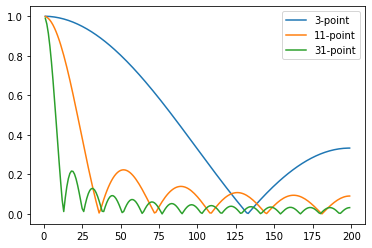

In [32]:
np.seterr(divide='ignore', invalid='ignore')
y3 = freq_response(np.linspace(0,.5,200), 3)
y11 = freq_response(np.linspace(0,.5,200), 11)
y31 = freq_response(np.linspace(0,.5,200), 31)
plt.plot(y3)
plt.plot(y11)
plt.plot(y31)
plt.legend(['3-point','11-point','31-point'])
plt.show()

#Task - 3

In [34]:
def one_pass(x, w):
    k = np.ones(w)/w
    y1 = np.convolve(x, k, mode='same')
    return y1

In [35]:
def two_pass(x, w):
  k = np.ones(w)/w
  y1 = np.convolve(x, k, mode='same')
  y2 = np.convolve(y1, k, mode='same')
  return y2

In [36]:
def four_pass(x, w):
  k = np.ones(w)/w
  y2 = two_pass(x, w)
  y3 = np.convolve(y2, k, mode='same')
  y4 = np.convolve(y3, k, mode='same')
  return y4

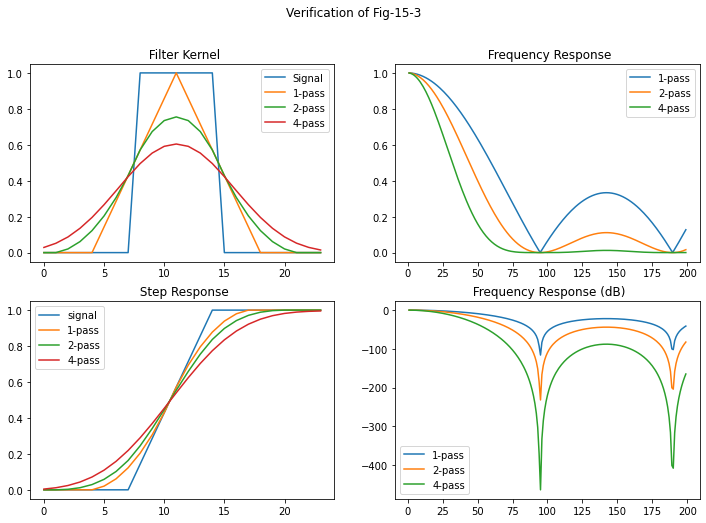

In [41]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Verification of Fig-15-3')
gs  = gridspec.GridSpec(2, 2)
a1 = plt.subplot(gs[0])
a2 = plt.subplot(gs[1])
a3 = plt.subplot(gs[2])
a4 = plt.subplot(gs[3])

#Task-3a
sig = np.array([0]*8 + [1]*7 + [0]*9)
y1 = one_pass(sig,7)
y2 = two_pass(sig,7)
y4 = four_pass(sig,7)
a1.plot(sig)
a1.plot(y1)
a1.plot(y2)
a1.plot(y4)
a1.legend(['Signal','1-pass','2-pass','4-pass'])
_ = a1.set_title('\n Filter Kernel')

#Task-3b
step = sig.cumsum()/7
step1 = y1.cumsum()/7
step2 = y2.cumsum()/7
step4 = y4.cumsum()/7
a3.plot(step)
a3.plot(step1)
a3.plot(step2)
a3.plot(step4)
a3.legend(['signal','1-pass','2-pass','4-pass'])
_ = a3.set_title('\n Step Response')

#Task-3c
freq1p = freq_response(np.linspace(0,0.7,200), 3)
freq2p = freq1p*freq1p
freq4p = freq2p*freq2p
a2.plot(freq1p)
a2.plot(freq2p)
a2.plot(freq4p)
a2.legend(['1-pass','2-pass','4-pass'])
_ = a2.set_title('\n Frequency Response')

#Task-3d
dbfreq1p = 20*np.log(freq1p)
dbfreq2p = 20*np.log(freq2p)
dbfreq4p = 20*np.log(freq4p)
a4.plot(dbfreq1p)
a4.plot(dbfreq2p)
a4.plot(dbfreq4p)
a4.legend(['1-pass','2-pass','4-pass'])
_ = a4.set_title('\n Frequency Response (dB)')

#Task-4

In [72]:
def sincfreq(x):
  return np.sin(x)/x

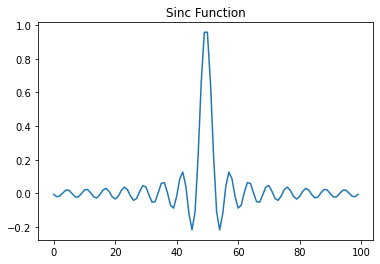

In [73]:
x = np.linspace(-50,50,100)
y = sincfreq(x)
plt.plot(y)
_ = plt.title('Sinc Function')
plt.show()

#Task-5

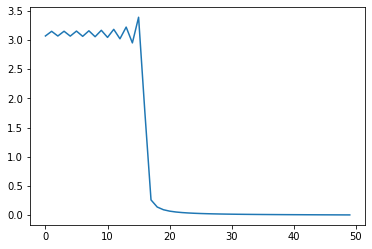

In [75]:
fre = np.absolute(np.fft.fft(y))
plt.plot(fre[0:int(len(fre)/2)])
plt.show()

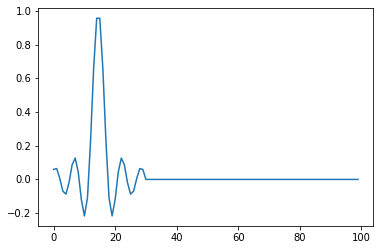

In [86]:
y_trunc = np.array(list(y[35:65]) + [0]*70)
plt.plot(y_trunc)
plt.show()

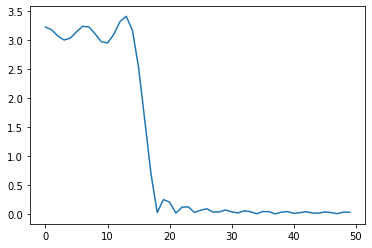

In [87]:
fre2 = np.absolute(np.fft.fft(y_trunc))
plt.plot(fre2[0:int(len(fre2)/2)])
plt.show()

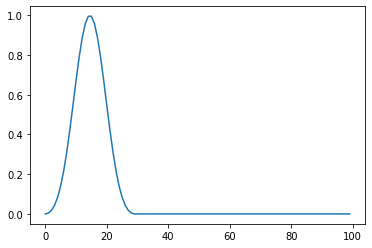

In [88]:
b = np.blackman(30)
b_padded = np.array(list(b)+[0]*70)
plt.plot(b_padded)
plt.show()

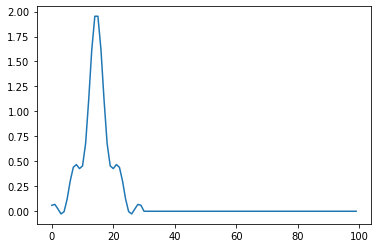

In [89]:
y_smooth = y_trunc + b_padded
plt.plot(y_smooth)
plt.show()

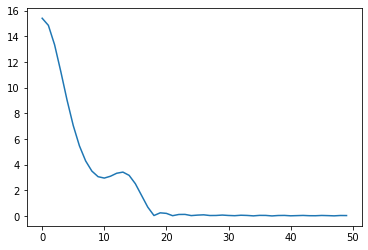

In [90]:
freq_smooth = np.absolute(np.fft.fft(y_smooth))
plt.plot(freq_smooth[0:int(len(freq_smooth)/2)])
plt.show()

###The response has a smoother rolloff taking M = 30

#Task-6

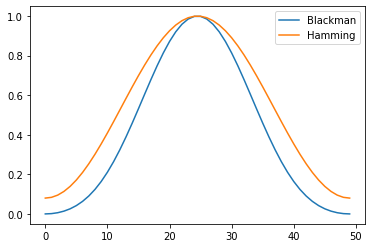

In [91]:
black = np.blackman(50)
ham = np.hamming(50)
plt.plot(black)
plt.plot(ham)
plt.legend(['Blackman','Hamming'])
plt.show()

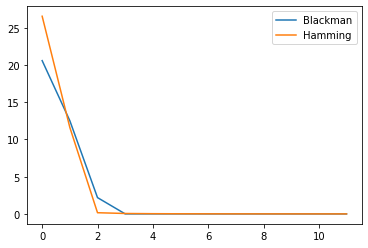

In [92]:
freq_black = np.absolute(np.fft.fft(black))
freq_ham = np.absolute(np.fft.fft(ham))
plt.plot(freq_black[0:int(len(freq_black)/4)])
plt.plot(freq_ham[0:int(len(freq_ham)/4)])
plt.legend(['Blackman','Hamming'])
plt.show()

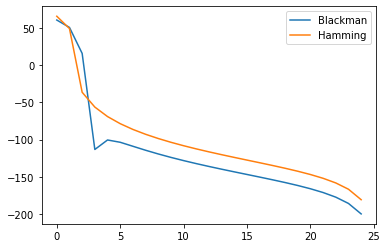

In [93]:
freq_black_db = 20*np.log(freq_black)
freq_ham_db = 20*np.log(freq_ham)
plt.plot(freq_black_db[0:int(len(freq_black_db)/2)])
plt.plot(freq_ham_db[0:int(len(freq_ham_db)/2)])
plt.legend(['Blackman','Hamming'])
plt.show()